# Лабораторная работа №3.1

#### Импорт библиотек, выбор стиля для графиков

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

%matplotlib inline
plt.style.use('ggplot')

#### Загрузка датасета и вывод информации о нём

In [34]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Названия сортов:", iris.target_names)
print("\nПервые 5 строк:")
print(df.head())

Названия сортов: ['setosa' 'versicolor' 'virginica']

Первые 5 строк:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


#### Визуализация зависимостей

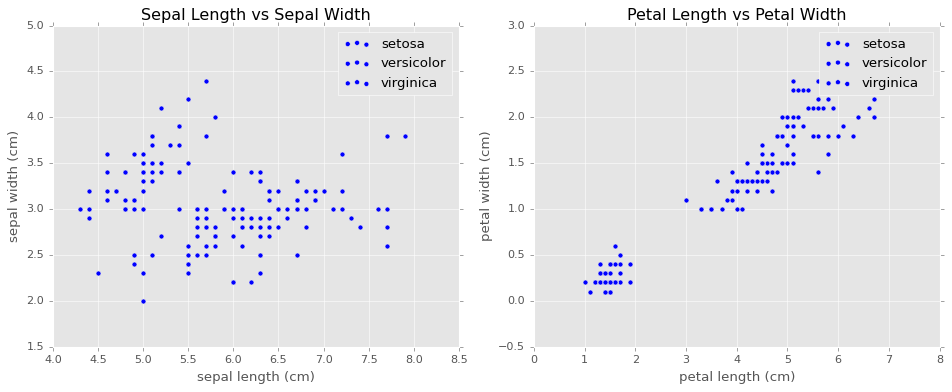

In [37]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for species in df['target'].unique():
    subset = df[df['target'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                label=iris.target_names[species])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

plt.subplot(1, 2, 2)
for species in df['target'].unique():
    subset = df[df['target'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], 
                label=iris.target_names[species])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

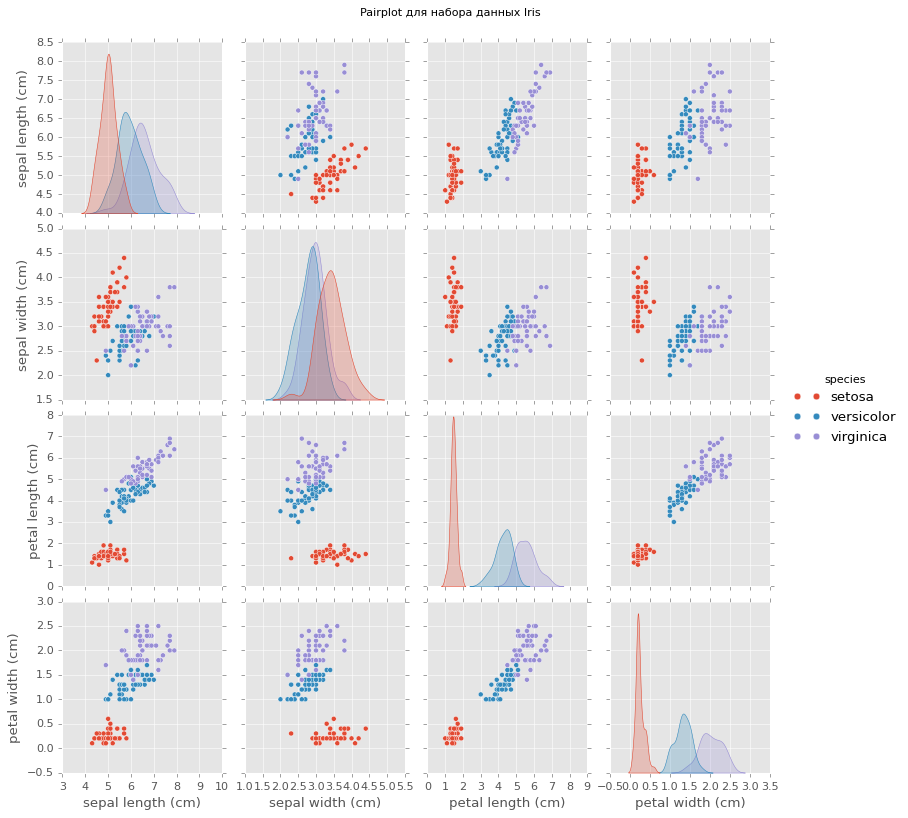

In [45]:
sns.pairplot(df, hue='species', vars=iris.feature_names)
plt.suptitle('Pairplot для набора данных Iris', y=1.02)
plt.show()

#### Подготовка датасетов

In [51]:
# Первый датасет: setosa и versicolor
df1 = df[df['target'].isin([0, 1])].copy()
X1 = df1[iris.feature_names]
y1 = df1['target']

# Второй датасет: versicolor и virginica
df2 = df[df['target'].isin([1, 2])].copy()
X2 = df2[iris.feature_names]
y2 = df2['target']

print(f"Размер первого датасета: {len(df1)}")
print(f"Размер второго датасета: {len(df2)}")

Размер первого датасета: 100
Размер второго датасета: 100


#### Обучение

In [56]:
def train_and_evaluate(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nРезультаты для датасета {dataset_name}")
    print(f"Точность: {accuracy:.4f}")
    
    return clf, X_train, X_test, y_train, y_test

model1, X1_train, X1_test, y1_train, y1_test = train_and_evaluate(X1, y1, "setosa vs versicolor")

model2, X2_train, X2_test, y2_train, y2_test = train_and_evaluate(X2, y2, "versicolor vs virginica")


Результаты для датасета setosa vs versicolor
Точность: 1.0000

Результаты для датасета versicolor vs virginica
Точность: 0.9333


#### Теперь сгенерируем датасет случайным образом и проведем для его бинарную классификацию

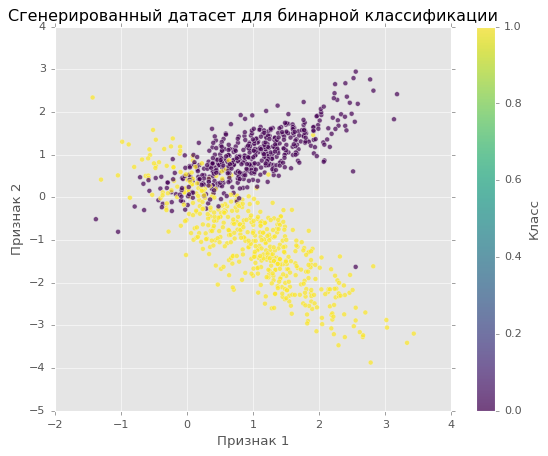


Результаты для синтетического датасета:
Точность модели: 0.9367


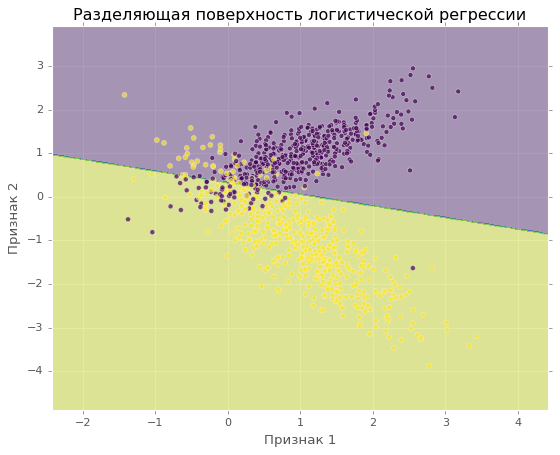

In [70]:
X_new, y_new = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                    n_informative=2, random_state=1, n_clusters_per_class=1)

plt.figure(figsize=(8, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap='viridis', alpha=0.7)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Сгенерированный датасет для бинарной классификации')
plt.colorbar(label='Класс')
plt.show()

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(
    X_new, y_new, test_size=0.3, random_state=42)

clf_synth = LogisticRegression(random_state=0)
clf_synth.fit(X_new_train, y_new_train)
y_new_pred = clf_synth.predict(X_new_test)

accuracy = accuracy_score(y_new_test, y_new_pred)
print(f"\nРезультаты для синтетического датасета:")
print(f"Точность модели: {accuracy:.4f}")

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title('Разделяющая поверхность логистической регрессии')
    plt.show()

plot_decision_boundary(X_new, y_new, clf_synth)